In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)  

from pandas_profiling import ProfileReport

# For Random seed values
from random import randint

# For Data Visualization
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
%matplotlib inline
import seaborn as sns

# For Data Modeling
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# To Disable Warnings
import warnings
warnings.filterwarnings("ignore")

/var/folders/yx/7fb8cgrd7_7c1vxtf73slfvr0000gn/T/ipykernel_52039/1906452120.py:9: DeprecationWarning: `import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.
  from pandas_profiling import ProfileReport


In [2]:
test_data = pd.read_csv("TestData.csv")
train_data = pd.read_csv("TrainData.csv")

In [3]:
print(train_data.shape)
print(test_data.shape)

(181, 27)
(20, 26)


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    object 
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

In [5]:
train_data.head()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.40000,175.60000,66.50000,53.90000,2458,ohc,four,122,mpfi,3.31,3.54,8.70000,92,4200,27,32,11248
1,2,0,188,bmw,gas,std,two,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2710,ohc,six,164,mpfi,3.31,3.19,9.00000,121,4250,21,28,20970
2,3,0,?,renault,gas,std,four,wagon,fwd,front,96.10000,181.50000,66.50000,55.20000,2579,ohc,four,132,mpfi,3.46,3.9,8.70000,?,?,23,31,9295
3,4,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3197,l,four,152,idi,3.7,3.52,21.00000,95,4150,28,33,13200
4,5,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2935,ohc,four,141,mpfi,3.78,3.15,9.50000,114,5400,24,28,15985


In [6]:
train_data.describe()

,ID,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000
mean,91.00000,0.85083,98.72928,174.17403,65.94365,53.70994,2564.16575,127.90055,10.15425,25.13260,30.64641,13271.31492
std,52.39434,1.26704,6.11620,12.33657,2.14611,2.49773,523.48902,42.57844,3.98231,6.41821,6.88855,8106.47963
min,1.00000,-2.00000,86.60000,141.10000,60.30000,47.80000,1488.00000,61.00000,7.00000,13.00000,16.00000,5118.00000
25%,46.00000,0.00000,94.50000,166.80000,64.20000,51.60000,2190.00000,98.00000,8.60000,19.00000,25.00000,7775.00000
50%,91.00000,1.00000,96.90000,173.20000,65.50000,54.10000,2420.00000,120.00000,9.00000,24.00000,30.00000,10295.00000
75%,136.00000,2.00000,102.40000,183.10000,66.60000,55.50000,2935.00000,146.00000,9.40000,30.00000,34.00000,16500.00000
max,181.00000,3.00000,120.90000,208.10000,72.00000,59.80000,4066.00000,326.00000,23.00000,49.00000,54.00000,45400.00000


In [7]:
train_data.skew()

ID                  0.00000
symboling           0.23452
wheel-base          1.04672
length              0.16649
width               0.85446
height              0.06784
curb-weight         0.71769
engine-size         1.95097
compression-ratio   2.58261
city-mpg            0.74214
highway-mpg         0.58690
price               1.82845
dtype: float64

In [8]:
train_data.columns = train_data.columns.str.replace("-", "_")
train_data.columns

Index(['ID', 'symboling', 'normalized_losses', 'make', 'fuel_type',
       'aspiration', 'num_of_doors', 'body_style', 'drive_wheels',
       'engine_location', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
       'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')

In [9]:
def convertToNumeric(colName): 
    return pd.to_numeric(colName, errors="coerce")

In [10]:
train_data.normalized_losses = convertToNumeric(train_data.normalized_losses)
train_data.bore = convertToNumeric(train_data.bore)
train_data.stroke = convertToNumeric(train_data.stroke)
train_data.horsepower = convertToNumeric(train_data.horsepower)
train_data.peak_rpm = convertToNumeric(train_data.peak_rpm)

In [11]:
def fillWithMedian(colName): 
    return colName.fillna(colName.median())

In [12]:
train_data.normalized_losses = fillWithMedian(train_data.normalized_losses)
train_data.bore = fillWithMedian(train_data.bore)
train_data.stroke = fillWithMedian(train_data.stroke)
train_data.horsepower = fillWithMedian(train_data.horsepower)
train_data.peak_rpm = fillWithMedian(train_data.peak_rpm)

In [13]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized_losses  181 non-null    float64
 3   make               181 non-null    object 
 4   fuel_type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num_of_doors       181 non-null    object 
 7   body_style         181 non-null    object 
 8   drive_wheels       181 non-null    object 
 9   engine_location    181 non-null    object 
 10  wheel_base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb_weight        181 non-null    int64  
 15  engine_type        181 non-null    object 
 16  num_of_cylinders   181 non

In [14]:
train_data.describe()

,ID,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000,181.00000
mean,91.00000,0.85083,119.76243,98.72928,174.17403,65.94365,53.70994,2564.16575,127.90055,3.33878,3.27613,10.15425,104.06630,5106.62983,25.13260,30.64641,13271.31492
std,52.39434,1.26704,31.68287,6.11620,12.33657,2.14611,2.49773,523.48902,42.57844,0.26229,0.30659,3.98231,37.76809,470.62042,6.41821,6.88855,8106.47963
min,1.00000,-2.00000,65.00000,86.60000,141.10000,60.30000,47.80000,1488.00000,61.00000,2.68000,2.19000,7.00000,48.00000,4150.00000,13.00000,16.00000,5118.00000
25%,46.00000,0.00000,98.00000,94.50000,166.80000,64.20000,51.60000,2190.00000,98.00000,3.15000,3.12000,8.60000,72.00000,4800.00000,19.00000,25.00000,7775.00000
50%,91.00000,1.00000,115.00000,96.90000,173.20000,65.50000,54.10000,2420.00000,120.00000,3.33000,3.35000,9.00000,95.00000,5100.00000,24.00000,30.00000,10295.00000
75%,136.00000,2.00000,134.00000,102.40000,183.10000,66.60000,55.50000,2935.00000,146.00000,3.59000,3.46000,9.40000,116.00000,5500.00000,30.00000,34.00000,16500.00000
max,181.00000,3.00000,256.00000,120.90000,208.10000,72.00000,59.80000,4066.00000,326.00000,3.94000,4.17000,23.00000,262.00000,6600.00000,49.00000,54.00000,45400.00000


In [15]:
train_data.skew()

ID                   0.00000
symboling            0.23452
normalized_losses    1.04631
wheel_base           1.04672
length               0.16649
width                0.85446
height               0.06784
curb_weight          0.71769
engine_size          1.95097
bore                 0.02585
stroke              -0.45847
compression_ratio    2.58261
horsepower           1.15591
peak_rpm             0.01983
city_mpg             0.74214
highway_mpg          0.58690
price                1.82845
dtype: float64

In [16]:
train_data.corr()*100

,ID,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
ID,100.00000,5.26383,-0.34070,-8.44461,-9.16835,-7.62847,0.38292,-7.61604,-2.31873,-10.60154,-6.06552,-9.24921,-5.25478,5.88273,3.60647,3.13550,-7.72117
symboling,5.26383,100.00000,47.64264,-53.98986,-36.29903,-23.45882,-56.18003,-21.02043,-9.15153,-6.92535,2.28191,-21.43881,11.39801,29.28164,-7.20185,0.41075,-6.63715
normalized_losses,-0.34070,47.64264,100.00000,-7.89888,-0.91425,8.98902,-38.77512,8.62055,9.02339,-3.14152,10.86701,-9.22905,21.12689,24.64633,-20.05954,-15.99653,10.15839
wheel_base,-8.44461,-53.98986,-7.89888,100.00000,87.79606,81.50365,57.85659,77.49553,57.91910,48.28313,23.11502,30.45896,35.94069,-38.19245,-44.25055,-52.40480,58.14421
length,-9.16835,-36.29903,-0.91425,87.79606,100.00000,86.20582,47.13156,87.87663,69.57227,62.49174,20.20669,20.31496,57.32030,-30.29505,-65.34639,-69.12303,69.13078
width,-7.62847,-23.45882,8.98902,81.50365,86.20582,100.00000,28.55510,86.36858,73.73316,55.14811,22.94300,22.31758,61.45289,-25.34771,-62.64715,-67.59389,76.11509
height,0.38292,-56.18003,-38.77512,57.85659,47.13156,28.55510,100.00000,27.90119,5.90546,16.64793,-3.14717,28.86636,-12.62243,-31.85774,-1.20387,-7.28643,11.23779
curb_weight,-7.61604,-21.02043,8.62055,77.49553,87.87663,86.36858,27.90119,100.00000,85.64356,64.93843,21.65042,19.56793,75.51701,-28.85335,-74.12604,-78.87800,83.63845
engine_size,-2.31873,-9.15153,9.02339,57.91910,69.57227,73.73316,5.90546,85.64356,100.00000,57.76613,20.35516,5.08382,82.15812,-26.23258,-64.74620,-67.91479,87.03303
bore,-10.60154,-6.92535,-3.14152,48.28313,62.49174,55.14811,16.64793,64.93843,57.76613,100.00000,-10.94202,3.04613,56.66301,-29.25162,-58.73833,-59.52964,54.68370


In [17]:
def checkCorr (df):
    return df.corr().price.sort_values(ascending=False)

<AxesSubplot:>

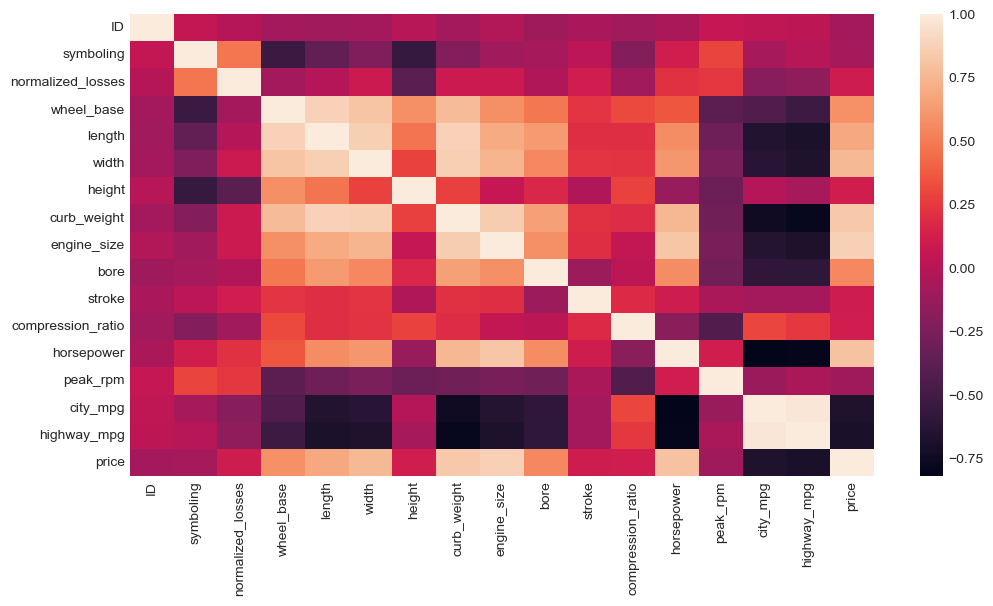

In [18]:
fig, ax = plt.subplots(figsize=(12,6))
sns.heatmap(train_data.corr())

In [19]:
corr_data= checkCorr(train_data)[checkCorr(train_data) != 1]

In [63]:
train_data.symboling.value_counts()

 0    59
 1    45
 2    28
 3    26
-1    21
-2     2
Name: symboling, dtype: int64

In [20]:
def checkForValueCounts (df):
    for d in df.columns:
        if df[d].dtype == 'object':
            print(d, "==========")
            print(df[d].value_counts())

In [21]:
checkForValueCounts(train_data)

make ==========
toyota           28
nissan           16
mazda            16
subaru           12
mitsubishi       12
honda            12
volkswagen       11
dodge             9
volvo             9
peugot            9
mercedes-benz     8
plymouth          6
bmw               5
saab              5
audi              5
porsche           4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
isuzu             2
mercury           1
Name: make, dtype: int64
fuel_type ==========
gas       163
diesel     18
Name: fuel_type, dtype: int64
aspiration ==========
std      147
turbo     34
Name: aspiration, dtype: int64
num_of_doors ==========
four    102
two      77
?         2
Name: num_of_doors, dtype: int64
body_style ==========
sedan          83
hatchback      62
wagon          22
hardtop         8
convertible     6
Name: body_style, dtype: int64
drive_wheels ==========
fwd    108
rwd     65
4wd      8
Name: drive_wheels, dtype: int64
engine_location ==========
front   

In [22]:
def countPlot (df):
    for col in df.columns:
        if df[col].dtype=='object':
            fig, ax = plt.subplots(figsize=(12, 6))
            df[col].value_counts().plot.bar(ax=ax)
            plt.xlabel(col)
            plt.ylabel("Value Counts")
            plt.show()
            

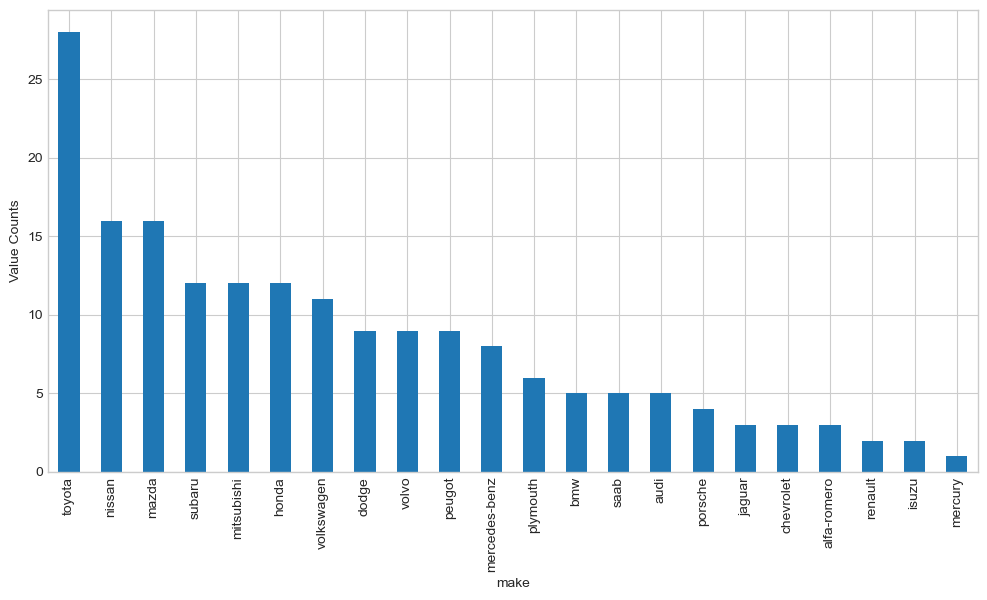

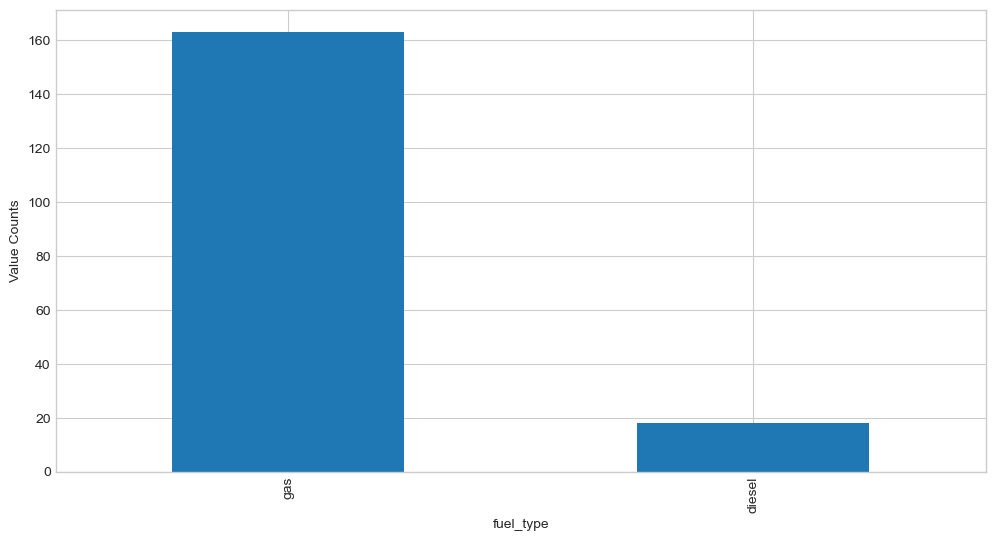

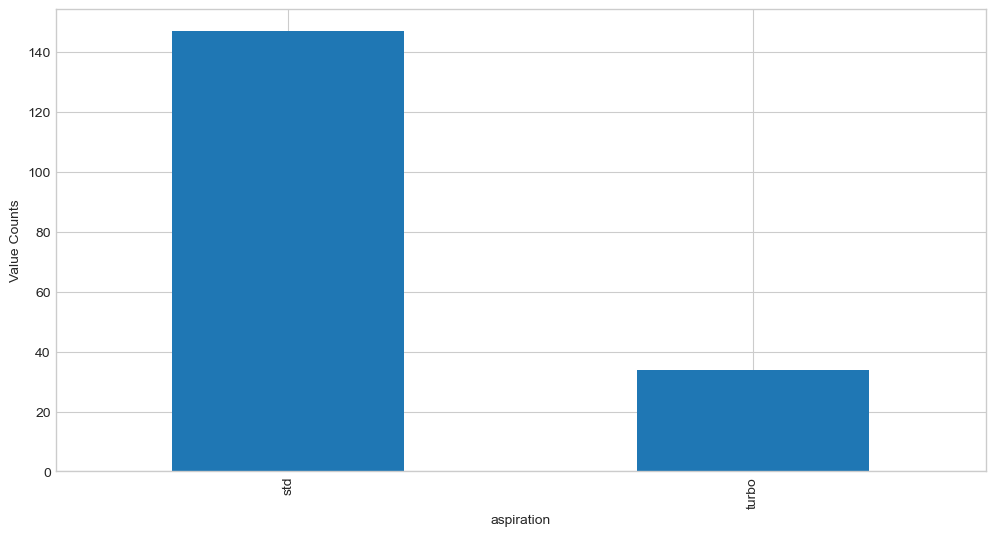

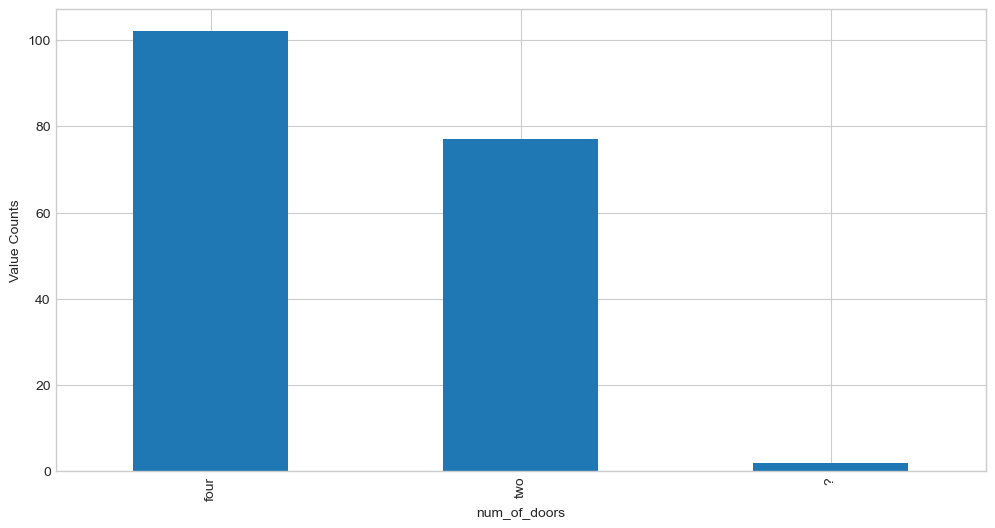

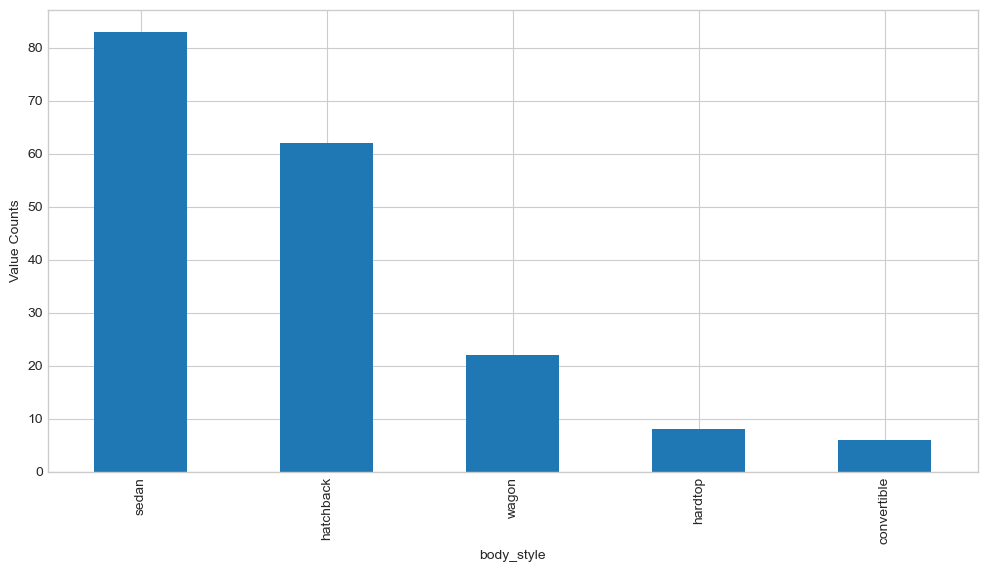

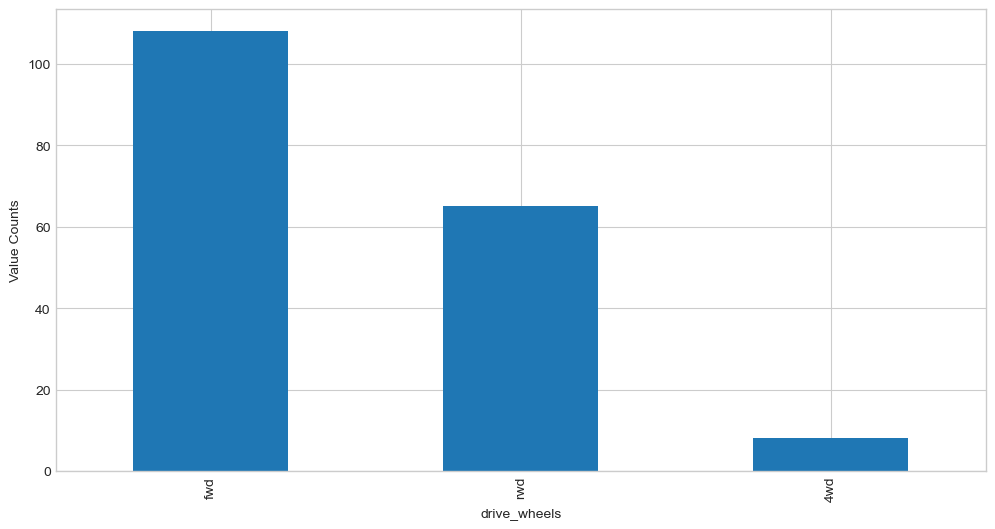

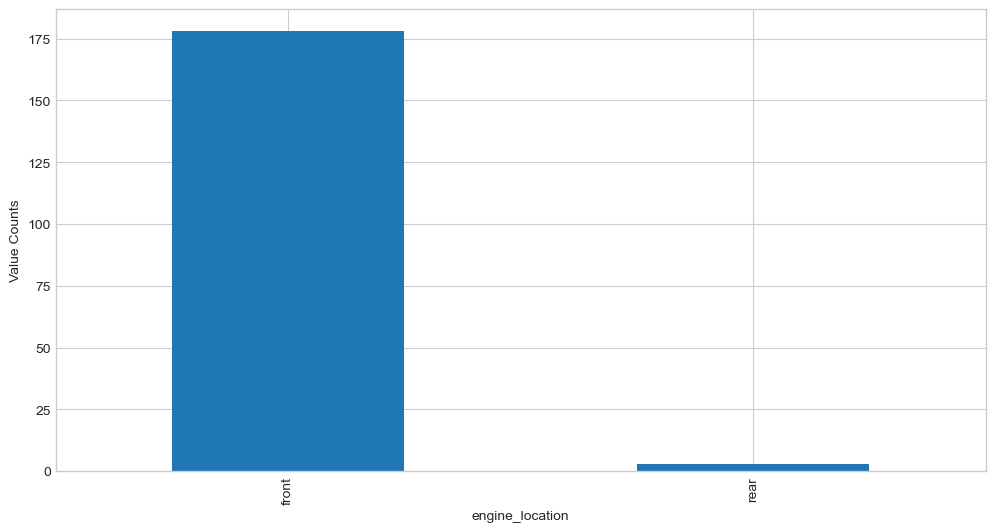

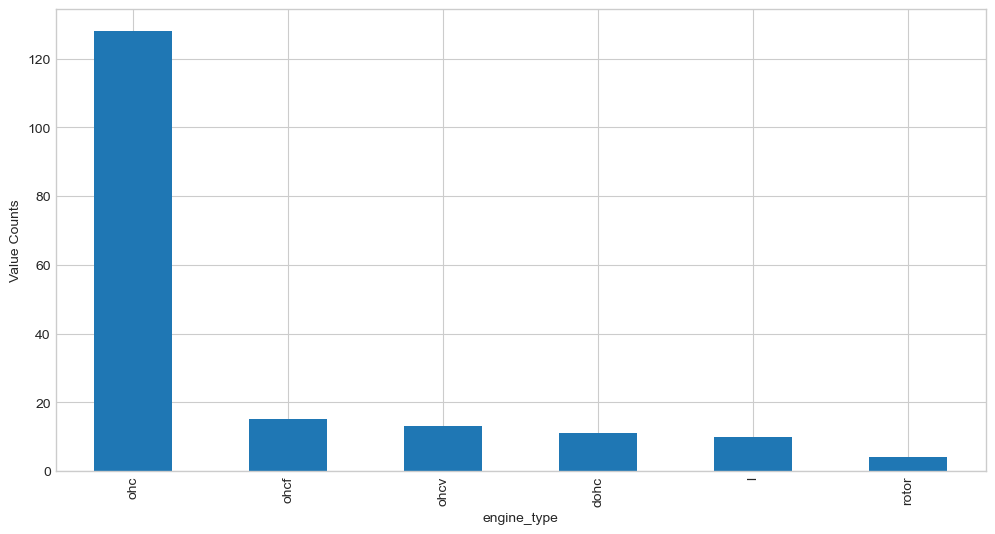

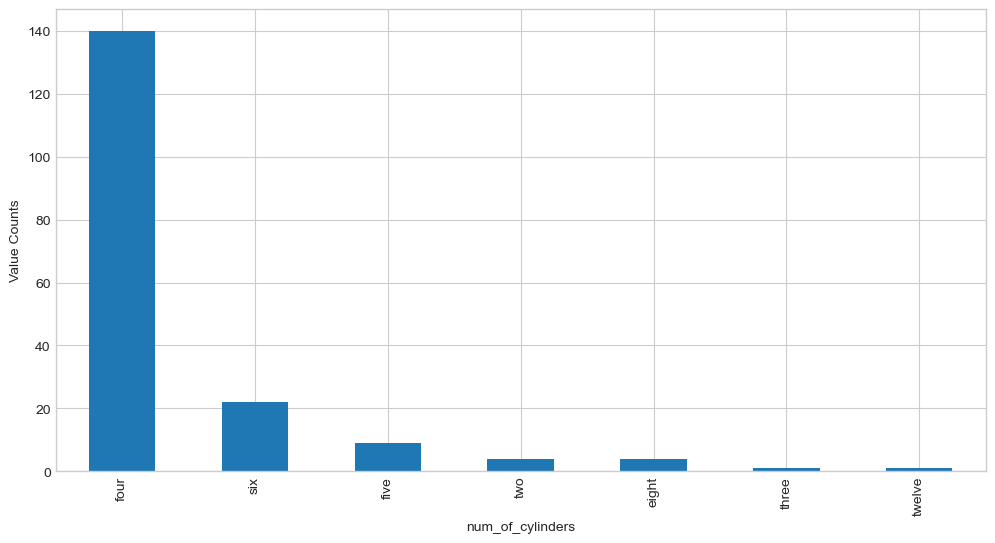

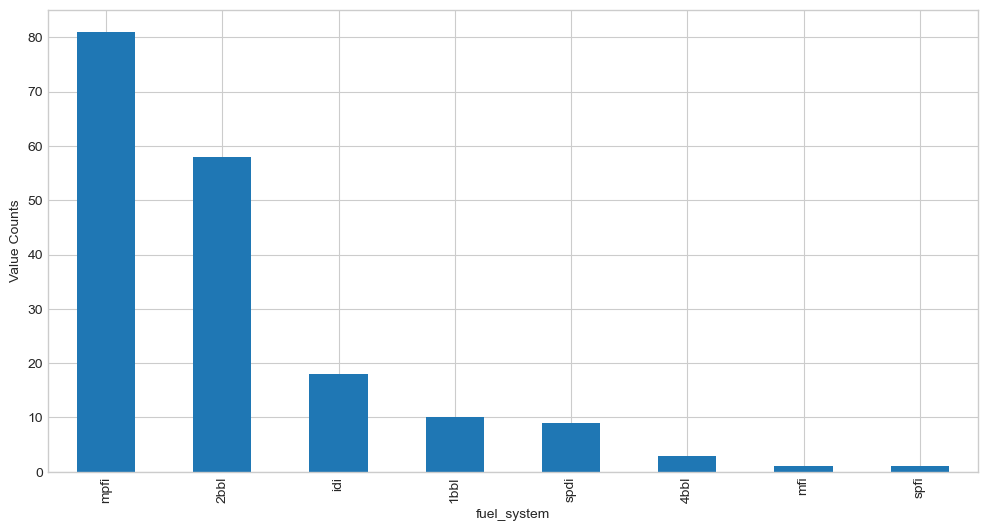

In [23]:
countPlot(train_data)

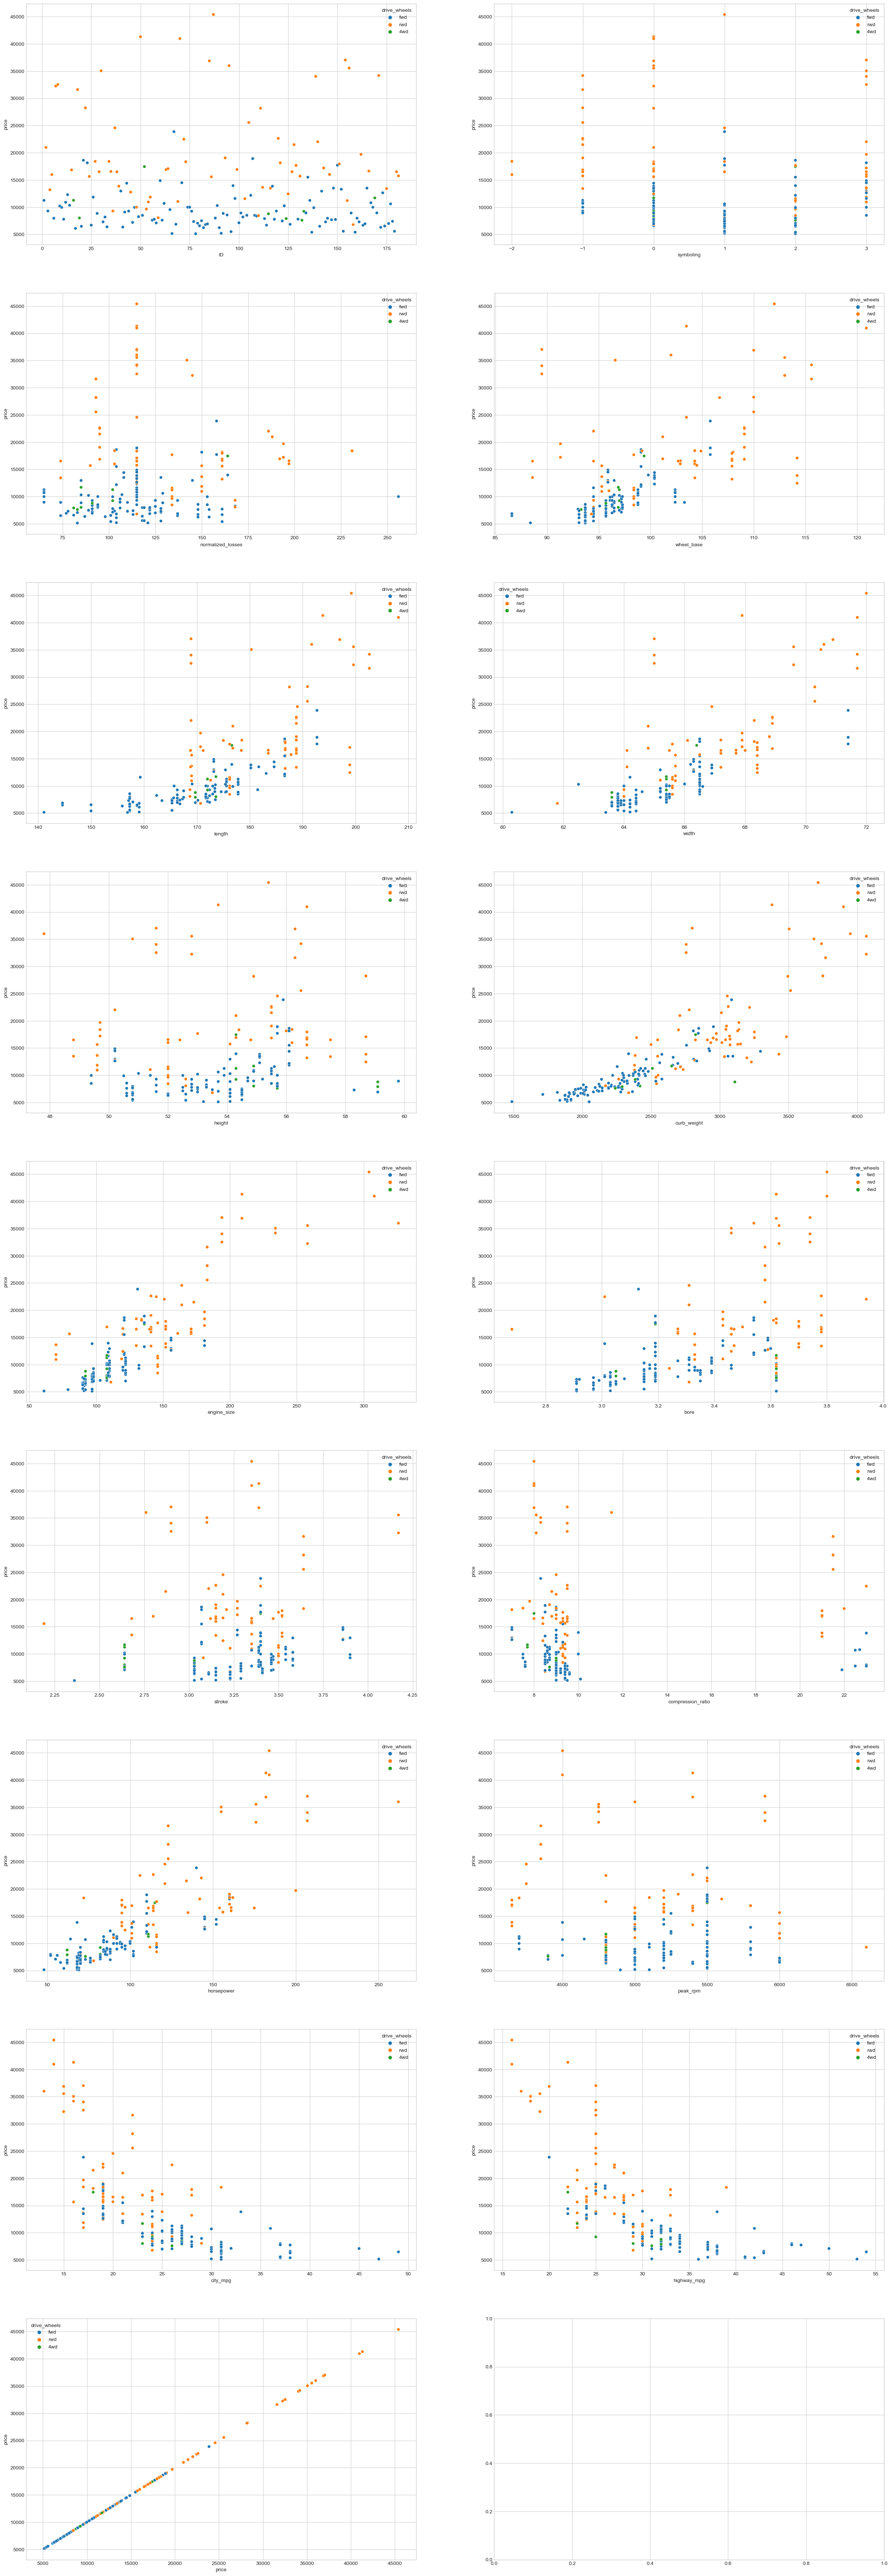

In [24]:
import math
# Int and Float cols should be slected
selected_columns = train_data.select_dtypes(['int', 'float']).columns.tolist()
# Set up the number of rows and columns for subplots
num_rows = math.ceil(len(selected_columns)/2)  # Adjust as needed
num_cols = 2

# Create subplots
fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15*num_cols, 10 * num_rows))
for i, col in enumerate(selected_columns):
    sns.scatterplot(x=train_data[col], y=train_data['price'],hue=train_data['drive_wheels'], ax=ax[i//2, i%2])

In [25]:
X_train = train_data.drop("price", axis=1)
y_train = train_data.price

In [27]:
le = LabelEncoder()
for i in X_train.columns:
    if X_train[i].dtypes == 'object':
        X_train[i] = le.fit_transform(X_train[i])
    

In [29]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [31]:
y_hat = model.predict(X_train)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
rmse = mean_squared_error(y_train,y_hat)
rmse

6597977.5028764

In [41]:
print(r2_score(y_train, y_hat))


0.8990393104374927


In [42]:
test_data

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,1,-2,103,volvo,gas,std,four,sedan,rwd,front,104.30000,188.80000,67.20000,56.20000,2912,ohc,four,141,mpfi,3.78000,3.15000,9.50000,114,5400,23,28
1,2,0,188,bmw,gas,std,four,sedan,rwd,front,101.20000,176.80000,64.80000,54.30000,2765,ohc,six,164,mpfi,3.31000,3.19000,9.00000,121,4250,21,28
2,3,-1,74,volvo,gas,turbo,four,wagon,rwd,front,104.30000,188.80000,67.20000,57.50000,3157,ohc,four,130,mpfi,3.62000,3.15000,7.50000,162,5100,17,22
3,4,1,154,plymouth,gas,std,four,sedan,fwd,front,93.70000,167.30000,63.80000,50.80000,1989,ohc,four,90,2bbl,2.97000,3.23000,9.40000,68,5500,31,38
4,5,1,103,nissan,gas,std,four,wagon,fwd,front,94.50000,170.20000,63.80000,53.50000,2037,ohc,four,97,2bbl,3.15000,3.29000,9.40000,69,5200,31,37
5,6,2,94,volkswagen,diesel,turbo,four,sedan,fwd,front,97.30000,171.70000,65.50000,55.70000,2319,ohc,four,97,idi,3.01000,3.40000,23.00000,68,4500,37,42
6,7,0,118,mazda,gas,std,four,sedan,rwd,front,104.90000,175.00000,66.10000,54.40000,2670,ohc,four,140,mpfi,3.76000,3.16000,8.00000,120,5000,19,27
7,8,0,161,peugot,gas,std,four,sedan,rwd,front,107.90000,186.70000,68.40000,56.70000,3020,l,four,120,mpfi,3.46000,3.19000,8.40000,97,5000,19,24
8,9,1,101,honda,gas,std,two,hatchback,fwd,front,93.70000,150.00000,64.00000,52.60000,1956,ohc,four,92,1bbl,2.91000,3.41000,9.20000,76,6000,30,34
9,10,2,161,mitsubishi,gas,std,two,hatchback,fwd,front,93.70000,157.30000,64.40000,50.80000,1944,ohc,four,92,2bbl,2.97000,3.23000,9.40000,68,5500,31,38


In [43]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 20 non-null     int64  
 1   symboling          20 non-null     int64  
 2   normalized-losses  20 non-null     object 
 3   make               20 non-null     object 
 4   fuel-type          20 non-null     object 
 5   aspiration         20 non-null     object 
 6   num-of-doors       20 non-null     object 
 7   body-style         20 non-null     object 
 8   drive-wheels       20 non-null     object 
 9   engine-location    20 non-null     object 
 10  wheel-base         20 non-null     float64
 11  length             20 non-null     float64
 12  width              20 non-null     float64
 13  height             20 non-null     float64
 14  curb-weight        20 non-null     int64  
 15  engine-type        20 non-null     object 
 16  num-of-cylinders   20 non-nu

In [44]:
test_data.columns = test_data.columns.str.replace("-", "_")
test_data.columns

Index(['ID', 'symboling', 'normalized_losses', 'make', 'fuel_type',
       'aspiration', 'num_of_doors', 'body_style', 'drive_wheels',
       'engine_location', 'wheel_base', 'length', 'width', 'height',
       'curb_weight', 'engine_type', 'num_of_cylinders', 'engine_size',
       'fuel_system', 'bore', 'stroke', 'compression_ratio', 'horsepower',
       'peak_rpm', 'city_mpg', 'highway_mpg'],
      dtype='object')

In [51]:
test_data.normalized_losses = convertToNumeric(test_data.normalized_losses)

In [52]:
test_data.normalized_losses = fillWithMedian(test_data.normalized_losses)

In [53]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 20 non-null     int64  
 1   symboling          20 non-null     int64  
 2   normalized_losses  20 non-null     float64
 3   make               20 non-null     object 
 4   fuel_type          20 non-null     object 
 5   aspiration         20 non-null     object 
 6   num_of_doors       20 non-null     object 
 7   body_style         20 non-null     object 
 8   drive_wheels       20 non-null     object 
 9   engine_location    20 non-null     object 
 10  wheel_base         20 non-null     float64
 11  length             20 non-null     float64
 12  width              20 non-null     float64
 13  height             20 non-null     float64
 14  curb_weight        20 non-null     int64  
 15  engine_type        20 non-null     object 
 16  num_of_cylinders   20 non-nu

In [54]:
for i in test_data.columns:
    if test_data[i].dtypes == 'object':
        test_data[i] = le.fit_transform(test_data[i])

In [55]:
test_data

,ID,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,length,width,height,curb_weight,engine_type,num_of_cylinders,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg
0,1,-2,103.00000,11,1,0,0,1,1,0,104.30000,188.80000,67.20000,56.20000,2912,2,1,141,3,3.78000,3.15000,9.50000,114,5400,23,28
1,2,0,188.00000,1,1,0,0,1,1,0,101.20000,176.80000,64.80000,54.30000,2765,2,2,164,3,3.31000,3.19000,9.00000,121,4250,21,28
2,3,-1,74.00000,11,1,1,0,2,1,0,104.30000,188.80000,67.20000,57.50000,3157,2,1,130,3,3.62000,3.15000,7.50000,162,5100,17,22
3,4,1,154.00000,7,1,0,0,1,0,0,93.70000,167.30000,63.80000,50.80000,1989,2,1,90,1,2.97000,3.23000,9.40000,68,5500,31,38
4,5,1,103.00000,5,1,0,0,2,0,0,94.50000,170.20000,63.80000,53.50000,2037,2,1,97,1,3.15000,3.29000,9.40000,69,5200,31,37
5,6,2,94.00000,10,0,1,0,1,0,0,97.30000,171.70000,65.50000,55.70000,2319,2,1,97,2,3.01000,3.40000,23.00000,68,4500,37,42
6,7,0,118.00000,3,1,0,0,1,1,0,104.90000,175.00000,66.10000,54.40000,2670,2,1,140,3,3.76000,3.16000,8.00000,120,5000,19,27
7,8,0,161.00000,6,1,0,0,1,1,0,107.90000,186.70000,68.40000,56.70000,3020,1,1,120,3,3.46000,3.19000,8.40000,97,5000,19,24
8,9,1,101.00000,2,1,0,1,0,0,0,93.70000,150.00000,64.00000,52.60000,1956,2,1,92,0,2.91000,3.41000,9.20000,76,6000,30,34
9,10,2,161.00000,4,1,0,1,0,0,0,93.70000,157.30000,64.40000,50.80000,1944,2,1,92,1,2.97000,3.23000,9.40000,68,5500,31,38


In [58]:
test_pred = model.predict(test_data)

In [60]:
csvData = pd.DataFrame()
csvData["id"] = test_data['ID']
csvData["predict"] = test_pred
csvData

,id,predict
0,1,19385.44944
1,2,18630.80984
2,3,19419.51905
3,4,8112.18886
4,5,8129.63173
5,6,11980.91859
6,7,18270.58411
7,8,19476.93875
8,9,10835.18254
9,10,9908.96417


In [62]:
csvData.to_csv("submission.csv",index=False, header=False)